## Seed size analysis
### Ware lab PFF Project 1
#### Aric Peng

In [2]:
## Import pandas, numpy, matplotlib, and seaborn in this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Read the seed size csv into a variable called df, using the pandas function read_csv().
df = pd.read_csv('ExtractedSizeValues.csv')
df

,Unnamed: 0,stdMinorAxisLength,sample,stdMajorAxisLength,majorAxisLength,averageArea,totalCount,stdArea,minorAxisLength
0,0,3.231043,SAP1,3.776266,50.508624,1600.640000,35,201.997402,40.811960
1,1,3.263786,SAP1,3.640803,50.636880,1604.640000,35,200.790812,40.826934
2,2,4.374542,SAP2,3.572401,42.906302,1267.131579,77,241.896908,38.172190
3,3,4.374657,SAP2,3.591888,43.056962,1277.342105,81,242.321152,38.319321
4,4,3.433112,SAP3,3.239658,48.511303,1636.913043,42,227.212008,43.375922
...,...,...,...,...,...,...,...,...,...
764,764,3.010237,SAP397,3.223489,45.888757,1331.795455,80,174.725184,37.583855
765,765,2.590243,SAP398,3.718171,50.855316,1696.617647,77,206.184243,43.165708
766,766,2.596240,SAP398,3.770512,50.975083,1703.941176,78,204.961681,43.248357
767,767,2.722905,BTX623,2.891303,47.777503,1612.400000,55,187.237983,43.470039


Look at the csv. What columns can we get rid of?  How could we rearrange the columns?

Read the documentation for `read_csv()` - What arguments could we pass in to make our life easier?

Drop the `'Unnamed: 0'` column, then use `df[df[*list of columns in desired order*]]` to reorder your columns so that `'sample'` is the first column.

Why do we assign the function result back to df?  Why do we add the argument `axis = 1`?

In [4]:
## Drop a column.
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
## Rearrange the columns, making sure to add all the other columns.
df = df[['sample', 'stdMinorAxisLength', 'stdMajorAxisLength', 'majorAxisLength', 'averageArea', 'totalCount', 'stdArea', 'minorAxisLength']]

First things first: look at the distribution of all your data.

Use seaborn's `distplot` function to create a histogram of the area values.  Histograms only accept a one-dimensional array of data <i>(Why?)</i>  Add the argument `kde = False`.


C:\Users\peng_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

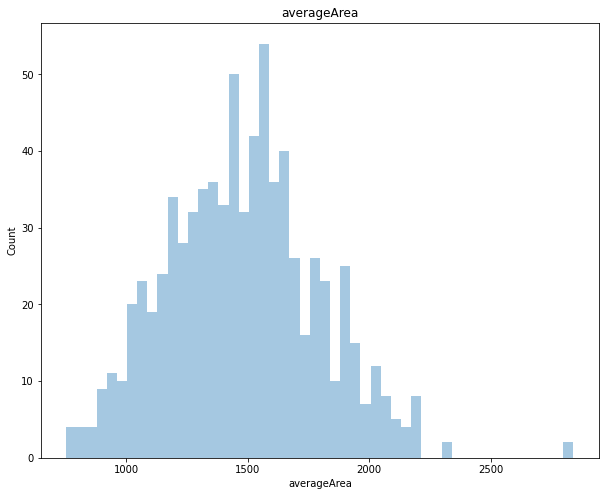

In [57]:
## Easiest way to create a single axes object with set figure size.
ax = plt.figure(figsize = [10, 8])

## Create your distplot and add arguments
data = df['averageArea']
ax = sns.distplot(a = data, kde = False, bins = 50)

## Add labels and title
plt.title('averageArea')
plt.ylabel('Count')

Looking at the shape of a distribution tells you a lot about the bias and trend of your data.  Research what a "normal curve" is.  Does this look like a normal curve?

"Bins" are how many partitions to separate your data into.  Set `bins = 50`.  What is the difference in the shape of this graph?  What if you graphed `df['stdArea']` instead?

Let's find the seeds with the largest sizes.  Remembering the conditional statements we did last week (`df[df['column'] > integer]`), return a dataframe `largestSeeds` for all rows in the dataframe with `averageArea` above <b>2200</b>.

In [7]:
## Do it here
largestSeeds = df[df['averageArea'] > 2200]
print (largestSeeds)

     sample  stdMinorAxisLength  stdMajorAxisLength  majorAxisLength  \
272  SAP141            3.239450            2.713849        56.489050   
273  SAP141            3.226619            2.685071        56.391258   
282  SAP146            3.514982            2.786075        56.919002   
515  SAP267            2.163331            1.641997        55.867515   
516  SAP267            2.169610            1.615675        55.946607   
521  SAP270            4.235080            5.478346        68.329660   
522  SAP270            4.180544            5.440708        68.132603   
617  SAP321            2.707945            2.145179        59.264981   
618  SAP321            2.660305            2.202043        59.186266   

     averageArea  totalCount     stdArea  minorAxisLength  
272  2204.708333          38  245.278664        50.602425  
273  2201.583333          38  242.731662        50.781893  
282  2200.718750          54  242.169651        50.066664  
515  2200.312500          48  136.10782

One of these samples does not have a second replicate with an average area above 2200.  Which sample, and what is the `averageArea` of this other replicate?  Do this programmatically using dataframe conditional statements like above.

In [8]:
## Do it here
replicateValue = 0
replicateSeed = ''

smallestSeeds = df[df['averageArea'] <= 2200]
##print(smallestSeeds)

for big_sample_row in largestSeeds['sample']:
    for small_sample_row in smallestSeeds['sample']:
        if big_sample_row == small_sample_row:
            replicateSeed = small_sample_row
            replicateValue = df[df['sample'] == (replicateSeed and smallestSeeds)]
            print (replicateSeed)
            print (replicateValue)

SAP146
    sample  stdMinorAxisLength  stdMajorAxisLength  majorAxisLength  \
0      NaN                 NaN                 NaN              NaN   
1      NaN                 NaN                 NaN              NaN   
2      NaN                 NaN                 NaN              NaN   
3      NaN                 NaN                 NaN              NaN   
4      NaN                 NaN                 NaN              NaN   
..     ...                 ...                 ...              ...   
764    NaN                 NaN                 NaN              NaN   
765    NaN                 NaN                 NaN              NaN   
766    NaN                 NaN                 NaN              NaN   
767    NaN                 NaN                 NaN              NaN   
768    NaN                 NaN                 NaN              NaN   

     averageArea  totalCount  stdArea  minorAxisLength  
0            NaN         NaN      NaN              NaN  
1            NaN         N

In [9]:
largestSeeds = df[df['averageArea'] > 2200]
largestSeeds

,sample,stdMinorAxisLength,stdMajorAxisLength,majorAxisLength,averageArea,totalCount,stdArea,minorAxisLength
272,SAP141,3.239450,2.713849,56.489050,2204.708333,38,245.278664,50.602425
273,SAP141,3.226619,2.685071,56.391258,2201.583333,38,242.731662,50.781893
282,SAP146,3.514982,2.786075,56.919002,2200.718750,54,242.169651,50.066664
515,SAP267,2.163331,1.641997,55.867515,2200.312500,48,136.107824,51.150818
516,SAP267,2.169610,1.615675,55.946607,2205.906250,49,135.312453,51.170961
521,SAP270,4.235080,5.478346,68.329660,2841.307692,41,385.304652,55.430842
522,SAP270,4.180544,5.440708,68.132603,2826.444444,42,381.946703,55.253195
617,SAP321,2.707945,2.145179,59.264981,2337.323529,50,162.299600,50.833633
618,SAP321,2.660305,2.202043,59.186266,2322.593750,50,162.473048,50.592187


In [10]:
largestSeeds[~largestSeeds.duplicated('sample', False)]['averageArea']

282    2200.71875
Name: averageArea, dtype: float64

We have a good idea of area, but what about thickness of a grain seed?  Use `majorAxisLength` and `minorAxisLength` to compare thickness with a 2D plot like `scatterplot`.

Text(0.5, 0, 'Long Side')

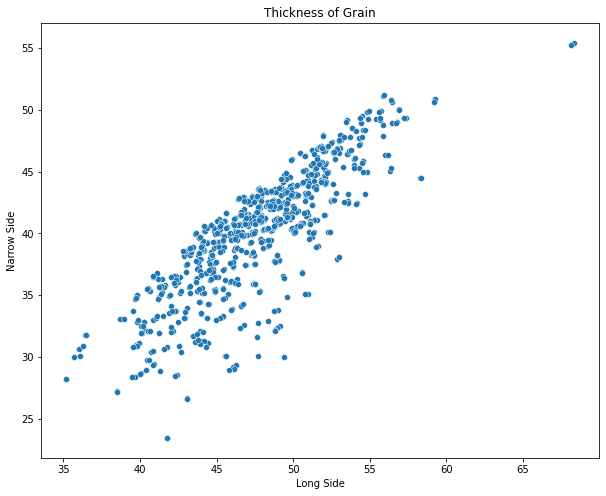

In [11]:
## Set figure size
ax = plt.figure(figsize = [10, 8])

## Create scatter plot
sns.scatterplot(x = df['majorAxisLength'], y = df['minorAxisLength'])
## Add labels
plt.title('Thickness of Grain')
plt.ylabel('Narrow Side')
plt.xlabel('Long Side')

Interpret this plot - what is thicker?  What are the outliers and does this make sense?

## Part 2
### Adding categorical data

Import the `GroundTruth.csv` and `ExtractedColorValues.csv` files to import the human-classified color and values.

In [12]:
#just wamted to try something I found

import os
print("GroundTruth.csv is", os.path.getsize('GroundTruth.csv') / 1e6, "MB")
print("ExtractedColorVlaues.csv is", os.path.getsize('ExtractedColorValues.csv') / 1e6, "MB")

GroundTruth.csv is 0.013923 MB
ExtractedColorVlaues.csv is 0.042656 MB


In [13]:
color = pd.read_csv('GroundTruth.csv')
values = pd.read_csv('ExtractedColorValues.csv', index_col = 'Unnamed: 0') # getting rid of an extra column using the index_col argument

In [14]:
color.head()

,Sample,Color,Color Forrest,Color Combined,Speckled
0,BTX623,white,white,white,False
1,SAP1,chalky white,chalky white,cream,False
2,SAP2,dark brown,dark brown,dark brown,False
3,SAP3,yellow,yellow,yellow,False
4,SAP4,cream,cream,cream,False


In [15]:
color.shape

(400, 5)

In [16]:
values.head()

,sample,r,g,b,closest color
0,SAP1,177.113617,146.541062,130.603466,chalky white
1,SAP1,176.898945,146.207459,130.211191,chalky white
2,SAP2,140.080460,94.878574,90.228280,light brown
3,SAP2,139.319698,94.010377,89.224908,light brown
4,SAP3,169.067009,131.896407,110.905102,yellow


In [17]:
values.shape

(769, 5)

Remember we have two replicates for each seed line.  Use the `groupby()` function on the `values` dataframe to aggregate by sample name, then find the mean of the RGB values in each grouping with `.mean()`.  

In [18]:
mean_values = values.groupby('sample').mean()
mean_values.head()  

,r,g,b
sample,,,
BTX623,179.816404,150.726638,136.068750
SAP1,177.006281,146.374260,130.407328
SAP10,160.052615,112.654095,97.292188
SAP100,184.586168,162.808320,153.857584
SAP101,165.707598,136.368766,123.458473


You'll see that your mean_values variable is a `groupby` object.  Use `reset_index()` to turn this back into a regular dataframe.  Pass the argument `inplace = True` so that you don't have to re-assign this result into a new variable (you can do this with many pandas functions).

In [19]:
mean_values.reset_index(inplace = True)

Perform EDA of the `color` dataframe.  Where are your null values?  How do we want to fill them in?  Use indexing and assignment to fill in the missing values in `Color Combined` and `Speckled` columns, assuming they are non-speckled and have the colors in the `Color` column.  Assign this dataframe to a variable `color_final`.

In [20]:
#color_final = ???
"""It is placed bellow"""

'It is placed bellow'

In [21]:
overview = color.groupby(['Color Combined', 'Speckled']).count()
overview.head()

Sample  Color  Color Forrest
Color Combined Speckled                              
chalky white   False         21     21              7
               True          16     16              9
cream          False         71     71             22
               True           7      7              4
dark brown     False         60     60             33

In [22]:
num_each_color = color.groupby('Color Combined').size()
num_each_color.head()

Color Combined
chalky white    37
cream           78
dark brown      62
light brown     49
light red       23
dtype: int64

In [23]:
"""I was trying to sort out the NaN valeus from the Color column"""
#color.groupby('Color').filter(lambda sf: sf['Color'].max() ==  color['Color'].isnull())

'I was trying to sort out the NaN valeus from the Color column'

In [24]:
# color.groupby('Speckled').filter(lambda sf: sf['Speckled'].max() == False)
"""
Do you understand how this works?  .max() between a True and False value will return False, 
as False has a value of 1 in Python whereas True has a value of 0.
"""

'\nDo you understand how this works?  .max() between a True and False value will return False, \nas False has a value of 1 in Python whereas True has a value of 0.\n'

In [25]:
nonSpeckled = color.groupby('Speckled').filter(lambda sf: sf['Speckled'].max() == False)
nonSpeckled

,Sample,Color,Color Forrest,Color Combined,Speckled
0,BTX623,white,white,white,False
1,SAP1,chalky white,chalky white,cream,False
2,SAP2,dark brown,dark brown,dark brown,False
3,SAP3,yellow,yellow,yellow,False
4,SAP4,cream,cream,cream,False
...,...,...,...,...,...
392,SAP393,dark brown,NaN,cream,False
393,SAP394,chalky white,NaN,red,False
394,SAP395,white,NaN,cream,False
395,SAP396,light brown,NaN,yellow,False


Good work here looking for null values.  This is a more reliable way of looking for null values based on single columns.  You can also use the `.dropna()` function, which can drop rows or columns that has all or any cells that have an NaN value. You can also choose which subset of columns to consider.  Try using this function.

In [26]:
NaN_index = color[color['Color'].isnull()].index
color.loc[NaN_index].head()

,Sample,Color,Color Forrest,Color Combined,Speckled


In [27]:
NaN_index = color[color['Color'].isnull()].index
color.loc[NaN_index].head()

## drop the indexes from color.csv
noNaN_color = color.drop(index = NaN_index, axis = 0)
color_speckle_final = color.groupby('Speckled').filter(lambda sf: sf['Speckled'].max() == False)
color_speckle_final

,Sample,Color,Color Forrest,Color Combined,Speckled
0,BTX623,white,white,white,False
1,SAP1,chalky white,chalky white,cream,False
2,SAP2,dark brown,dark brown,dark brown,False
3,SAP3,yellow,yellow,yellow,False
4,SAP4,cream,cream,cream,False
...,...,...,...,...,...
392,SAP393,dark brown,NaN,cream,False
393,SAP394,chalky white,NaN,red,False
394,SAP395,white,NaN,cream,False
395,SAP396,light brown,NaN,yellow,False


In [28]:
## find the indexes with unreliable data
NaN_index = color[color['Color Combined'].isnull()].index
color.loc[NaN_index].head()

## drop the indexes from color.csv
color.drop(index = NaN_index, axis = 0)
noNaN_color = color.dropna()
color_speckle_final = color.groupby('Speckled').filter(lambda sf: sf['Speckled'].max() == False)
color_speckle_final

,Sample,Color,Color Forrest,Color Combined,Speckled
0,BTX623,white,white,white,False
1,SAP1,chalky white,chalky white,cream,False
2,SAP2,dark brown,dark brown,dark brown,False
3,SAP3,yellow,yellow,yellow,False
4,SAP4,cream,cream,cream,False
...,...,...,...,...,...
392,SAP393,dark brown,NaN,cream,False
393,SAP394,chalky white,NaN,red,False
394,SAP395,white,NaN,cream,False
395,SAP396,light brown,NaN,yellow,False


In the previous 2 sections I played around with using diffent sets for NaN_index. How come my result with 'Color' and 'Color Combined' are the same?

In [29]:
"""for col, tb in color.groupby('Color'):
    print(col)
    display(tb)"""

"for col, tb in color.groupby('Color'):\n    print(col)\n    display(tb)"

Now left join the `color` and `mean_values` tables using `'Sample'`/`'sample'` as a primary key, using `merge()`.

In [30]:
"""color_merged = color.merge(mean_values, how = 'left', left_on = 'Sample', right_on = 'sample', sort = True)
color_merged"""

"color_merged = color.merge(mean_values, how = 'left', left_on = 'Sample', right_on = 'sample', sort = True)\ncolor_merged"

In [49]:
color

,Sample,Color,Color Forrest,Color Combined,Speckled
0,BTX623,white,white,white,False
1,SAP1,chalky white,chalky white,cream,False
2,SAP2,dark brown,dark brown,dark brown,False
3,SAP3,yellow,yellow,yellow,False
4,SAP4,cream,cream,cream,False
...,...,...,...,...,...
395,SAP396,light brown,NaN,yellow,False
396,SAP397,cream,NaN,red,True
397,SAP398,light brown,NaN,light red,False
398,SAP399,light brown,NaN,NaN,NaN


In [50]:
mean_values

,sample,r,g,b
0,BTX623,179.816404,150.726638,136.068750
1,SAP1,177.006281,146.374260,130.407328
2,SAP10,160.052615,112.654095,97.292188
3,SAP100,184.586168,162.808320,153.857584
4,SAP101,165.707598,136.368766,123.458473
...,...,...,...,...
385,SAP95,123.450842,70.515437,62.333169
386,SAP96,145.153681,101.879086,88.179376
387,SAP97,177.250686,148.408915,135.301569
388,SAP98,148.976561,113.130651,107.026493


Test out a few different merges.  What happens if you switch color and mean_values?  What if you use values instead of mean_values?  What if you do an outer instead of an left join?  Write down your observations.

Write down some stuff in this cell.

In [56]:
color_merged = color.merge(mean_values, how = 'right', left_on = 'Sample', right_on = 'sample', sort = True)
color_merged

,Sample,Color,Color Forrest,Color Combined,Speckled,sample,r,g,b
0,BTX623,white,white,white,False,BTX623,179.816404,150.726638,136.068750
1,SAP1,chalky white,chalky white,cream,False,SAP1,177.006281,146.374260,130.407328
2,SAP10,cream,cream,light brown,False,SAP10,160.052615,112.654095,97.292188
3,SAP100,cream,white,white,False,SAP100,184.586168,162.808320,153.857584
4,SAP101,white,cream,chalky white,False,SAP101,165.707598,136.368766,123.458473
...,...,...,...,...,...,...,...,...,...
385,SAP95,dark brown,dark brown,dark brown,False,SAP95,123.450842,70.515437,62.333169
386,SAP96,light brown,light brown,light brown,False,SAP96,145.153681,101.879086,88.179376
387,SAP97,cream,white,white,False,SAP97,177.250686,148.408915,135.301569
388,SAP98,white,light brown,chalky white,True,SAP98,148.976561,113.130651,107.026493


In [32]:
"""color_merged = color.merge(values, how = 'right', left_on = 'Sample', right_on = 'sample', sort = True)
color_merged"""

"color_merged = color.merge(values, how = 'right', left_on = 'Sample', right_on = 'sample', sort = True)\ncolor_merged"

In [33]:
"""color_merged = color.merge(values, how = 'outer', left_on = 'Sample', right_on = 'sample', sort = True)
color_merged"""

"color_merged = color.merge(values, how = 'outer', left_on = 'Sample', right_on = 'sample', sort = True)\ncolor_merged"

### EDA with plots

'How do I make a barplot that can compare three axes (I added z)? And why is ax = axes[i] giving me a subscript TypeError?'

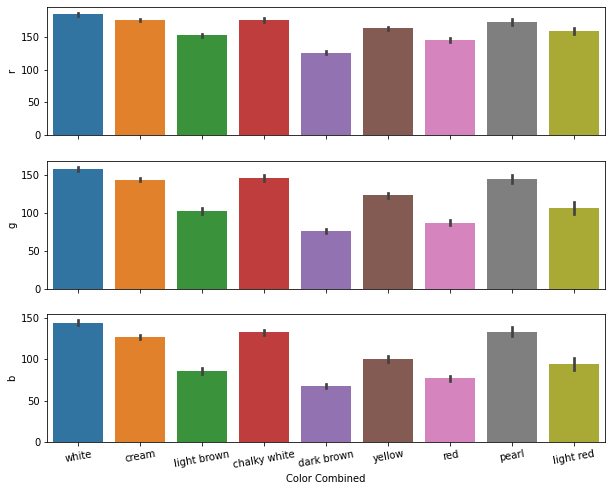

In [34]:
## Use plt.subplot to make seaborn barplots using 'Color Combined' as a category to compare r, g, and b values across.  
fig, axes = plt.subplots(nrows = 3, figsize = [10, 8], sharex = True)
RGBcolors = ['r', 'g', 'b']

for i, col in enumerate(RGBcolors):
    ax = axes[i]
    sns.barplot(y= col, x = 'Color Combined', data = color_merged, ax = ax)
    if i < 2:
        ax.set_xlabel('')
    ax.set_ylabel(col)
    plt.xticks(rotation = 10)

"""How do I make a barplot that can compare three axes (I added z)? And why is ax = axes[i] giving me a subscript TypeError?"""

In this case, I wanted to show how you can use subplots to create multiple barplots, each for a different RGB value.  You can't add a z-axis on a 2D plot, but you can plot your numerical data on the y axis, categorical data on the x axis, and another categorical data (i.e. Speckled) using hue.  Did not figure out why you were getting a TypeError (there were a lot of issues).

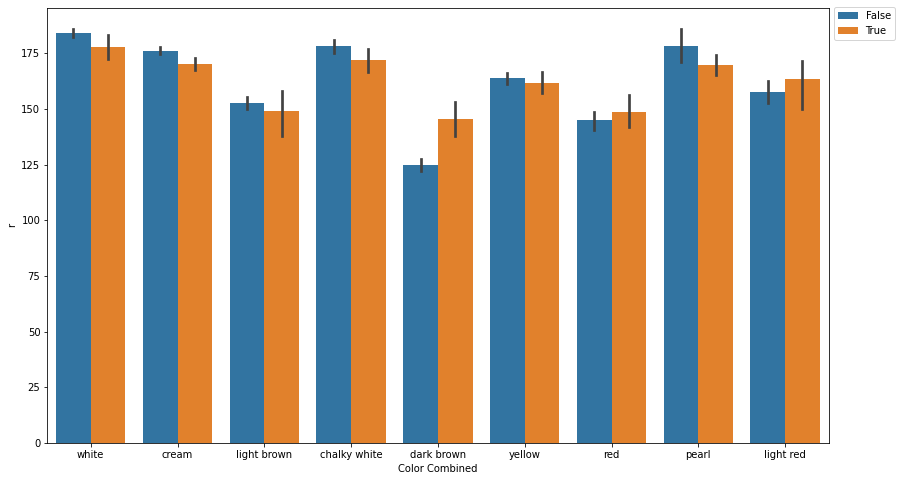

In [35]:
## Use seaborn to make a seaborn barplot using 'Color Combined' as a category to compare 'r' values, using 'Speckled'
## for a hue argument.  Label and title.  Try to  make it look pretty.
plt.figure(figsize=[14,8])

ax = sns.barplot(x = 'Color Combined', 
            y = 'r', 
            hue = 'Speckled', 
            data = color_merged
           )

plt.legend(bbox_to_anchor=(1,1.0132), loc='upper left')

Very close, but swap 'Speckled' for 'Color Combined' (should look more familiar to the last plot).  Try moving the legend outside of the figure (stackoverflow for this).

In [36]:
"""plt.figure(figsize = [14,7])
ax = sns.scatterplot(
x = 'Color Combined',
y = '')"""

"plt.figure(figsize = [14,7])\nax = sns.scatterplot(\nx = 'Color Combined',\ny = '')"

### Now do the same thing, but with seed size.
Merge the seed size table with the color table.  Do different seed colors have different sizes in general?

In [37]:
df_merged = df.merge(color, how = 'left', left_on = 'sample', right_on = 'Sample', sort = True)
df_merged

,sample,stdMinorAxisLength,stdMajorAxisLength,majorAxisLength,averageArea,totalCount,stdArea,minorAxisLength,Sample,Color,Color Forrest,Color Combined,Speckled
0,BTX623,2.722905,2.891303,47.777503,1612.400000,55,187.237983,43.470039,BTX623,white,white,white,False
1,BTX623,2.750525,2.854510,47.846348,1615.431818,55,187.709446,43.484828,BTX623,white,white,white,False
2,SAP1,3.231043,3.776266,50.508624,1600.640000,35,201.997402,40.811960,SAP1,chalky white,chalky white,cream,False
3,SAP1,3.263786,3.640803,50.636880,1604.640000,35,200.790812,40.826934,SAP1,chalky white,chalky white,cream,False
4,SAP10,5.400440,4.552601,44.682673,1293.937500,48,316.964109,38.076498,SAP10,cream,cream,light brown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,SAP97,3.162710,3.054009,49.814924,1693.434783,45,198.211531,43.824122,SAP97,cream,white,white,False
765,SAP98,4.214957,2.868546,48.008747,1436.291667,61,209.683786,40.273790,SAP98,white,light brown,chalky white,True
766,SAP98,4.185082,2.887998,48.082755,1441.500000,61,208.526977,40.321830,SAP98,white,light brown,chalky white,True
767,SAP99,4.543623,5.487753,53.597152,1670.428571,83,278.374033,42.578421,SAP99,dark brown,dark brown,dark brown,False


The variable 'color' was used in the plotting above and overrode the dataframe.  I changed it to 'col' to make it easier.  You're on the right track.  Note that a 'GroupBy' object is not the same as an actual dataframe, and you'll need to use a groupby function on it (such as `.mean()`) first to change it back into a dataframe before resetting the index.

In [38]:
#I'm trying to gorup this by Color Combined inorder to see if color correleates to size

df_merged = df.merge(color, how = 'left', left_on = 'sample', right_on = 'Sample', sort = True).groupby("Color Combined").mean()
df_merged.reset_index(inplace = True)
df_merged

,Color Combined,stdMinorAxisLength,stdMajorAxisLength,majorAxisLength,averageArea,totalCount,stdArea,minorAxisLength
0,chalky white,3.264802,3.400214,47.959536,1541.641756,52.216216,206.254667,41.383365
1,cream,3.078559,3.180062,48.764374,1600.508649,49.673333,190.457111,41.990798
2,dark brown,3.026786,3.980879,44.372340,1181.794637,98.587719,173.552190,34.464072
3,light brown,3.250605,3.548716,46.513723,1381.209619,67.645833,193.339109,38.211080
4,light red,3.092887,3.225073,46.855774,1475.503931,61.166667,193.675134,40.376640
5,pearl,3.453050,3.737665,47.664771,1516.848896,53.000000,216.934598,40.925217
6,red,3.270160,3.607273,48.321455,1519.664921,68.586207,205.966079,40.375232
7,white,3.150736,3.242920,47.691348,1486.243948,48.367816,190.697168,39.872138
8,yellow,3.344947,3.326534,49.599567,1659.211558,51.280899,215.922851,42.951028


In [39]:
df_merged.groupby('Color Combined').mean()

,stdMinorAxisLength,stdMajorAxisLength,majorAxisLength,averageArea,totalCount,stdArea,minorAxisLength
Color Combined,,,,,,,
chalky white,3.264802,3.400214,47.959536,1541.641756,52.216216,206.254667,41.383365
cream,3.078559,3.180062,48.764374,1600.508649,49.673333,190.457111,41.990798
dark brown,3.026786,3.980879,44.372340,1181.794637,98.587719,173.552190,34.464072
light brown,3.250605,3.548716,46.513723,1381.209619,67.645833,193.339109,38.211080
light red,3.092887,3.225073,46.855774,1475.503931,61.166667,193.675134,40.376640
pearl,3.453050,3.737665,47.664771,1516.848896,53.000000,216.934598,40.925217
red,3.270160,3.607273,48.321455,1519.664921,68.586207,205.966079,40.375232
white,3.150736,3.242920,47.691348,1486.243948,48.367816,190.697168,39.872138
yellow,3.344947,3.326534,49.599567,1659.211558,51.280899,215.922851,42.951028


In [40]:
df_merged = df.merge(color, how = 'left', left_on = 'sample', right_on = 'Sample', sort = True)
print(list(df_merged.dropna(axis=1)))


['sample', 'stdMinorAxisLength', 'stdMajorAxisLength', 'majorAxisLength', 'averageArea', 'totalCount', 'stdArea', 'minorAxisLength']


# Which one is best?

Text(0.5, 0, 'Long Side')

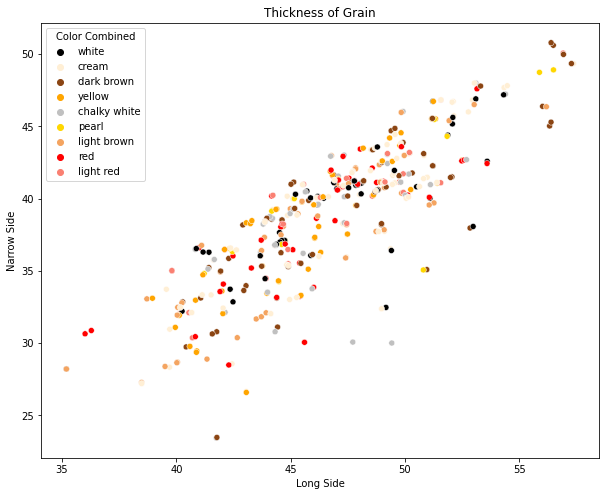

In [41]:
## Set figure size
ax = plt.figure(figsize = [10, 8])

color_dict = dict({
    'chalky white':'silver',
    'cream':'papayawhip',
    'dark brown':'saddlebrown',
    'light brown':'sandybrown',
    'light red':'salmon',
    'pearl':'gold',
    'red':'red',
    'white':'black',
    'yellow':'orange'
})

## Create scatter plot
sns.scatterplot(x = df['majorAxisLength'], y = df['minorAxisLength'], hue = 'Color Combined', data = color, palette = color_dict)

## Add labels
plt.title('Thickness of Grain')
plt.ylabel('Narrow Side')
plt.xlabel('Long Side')

Text(0.5, 0, 'Long Side')

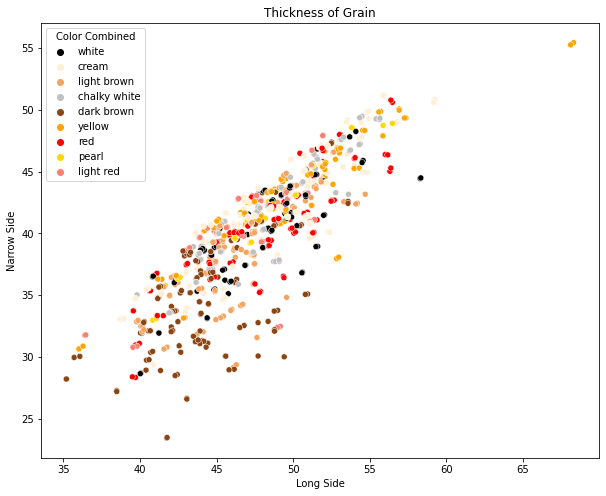

In [42]:
## Set figure size
ax = plt.figure(figsize = [10, 8])

color_dict = dict({
    'chalky white':'silver',
    'cream':'papayawhip',
    'dark brown':'saddlebrown',
    'light brown':'sandybrown',
    'light red':'salmon',
    'pearl':'gold',
    'red':'red',
    'white':'black',
    'yellow':'orange'
})

## Create scatter plot
sns.scatterplot(x = df_merged['majorAxisLength'], y = df_merged['minorAxisLength'], hue = 'Color Combined', data = df_merged, palette = color_dict)

## Add labels
plt.title('Thickness of Grain')
plt.ylabel('Narrow Side')
plt.xlabel('Long Side')

In [43]:
antiNull_df_merged = list(set(df_merged["Color Combined"].dropna(axis=0)))
antiNull_df_merged

['yellow',
 'cream',
 'pearl',
 'chalky white',
 'white',
 'light brown',
 'dark brown',
 'red',
 'light red']

In [44]:
RGBcolors = antiNull_df_merged

In [45]:
"""list(set(df_merged['Color Combined']))"""

"list(set(df_merged['Color Combined']))"

C:\Users\peng_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


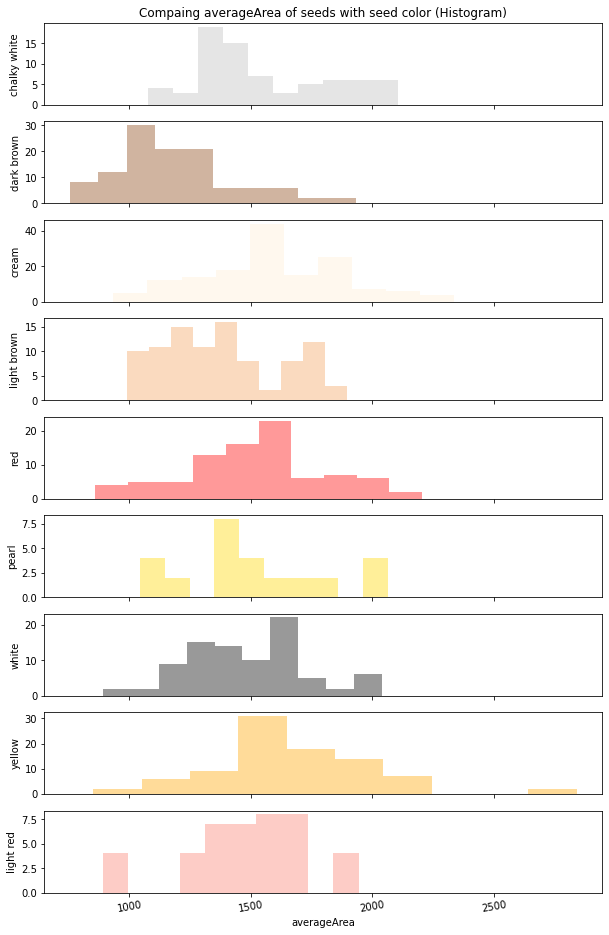

In [46]:
fig, axes = plt.subplots(nrows = 9, figsize = [10, 16], sharex = True)
# RGBcolors = list(set(df_merged['Color Combined']))
RGBcolors = [
 'chalky white',
 'dark brown',
 'cream',
 'light brown',
 'red',
 'pearl',
 'white',
 'yellow',
 'light red']

for i, col in enumerate(RGBcolors):
    ax = axes[i]
    this_color = color_dict[col]
    sns.distplot(df_merged[df_merged['Color Combined'] == col]['averageArea'], ax = ax, bins = 10, kde = False, color = this_color)
    ax.set_title('')
    if i == 0:
        ax.set_title('Compaing averageArea of seeds with seed color (Histogram)')
    if i < 8:
        ax.set_xlabel('')
    ax.set_ylabel(col)
    plt.xticks(rotation = 10)

# How come white is missing?

In [47]:
df_merged[df_merged['Color Combined'] == 'light red']

,sample,stdMinorAxisLength,stdMajorAxisLength,majorAxisLength,averageArea,totalCount,stdArea,minorAxisLength,Sample,Color,Color Forrest,Color Combined,Speckled
102,SAP144,2.891829,5.276868,51.394926,1654.772727,53,247.594047,41.114515,SAP144,light brown,light brown,light red,False
103,SAP144,2.991159,5.118130,51.113312,1638.909091,51,246.267207,40.961423,SAP144,light brown,light brown,light red,False
145,SAP165,2.585615,2.259629,45.979118,1397.444444,66,131.155430,39.561591,SAP165,light brown,light brown,light red,False
146,SAP165,2.572714,2.267295,46.012900,1398.416667,66,129.933824,39.565847,SAP165,light brown,light brown,light red,False
147,SAP166,3.440047,3.543369,45.210187,1417.678571,67,204.667161,40.297910,SAP166,red,red,light red,False
148,SAP166,3.373190,3.231130,44.847783,1409.928571,67,203.982830,40.159021,SAP166,red,red,light red,False
159,SAP171,2.641333,2.739406,49.169072,1238.541667,75,108.946080,32.463691,SAP171,red,light brown,light red,False
160,SAP171,2.651723,2.833020,48.975478,1229.708333,75,109.396252,32.371894,SAP171,red,light brown,light red,False
182,SAP182,3.570431,2.509492,49.641093,1639.500000,34,198.836491,42.778042,SAP182,red,light brown,light red,False
183,SAP182,3.609444,2.701480,49.844024,1686.043478,46,208.587481,43.583746,SAP182,red,light brown,light red,False


Text(0.5, 0, 'averageArea')

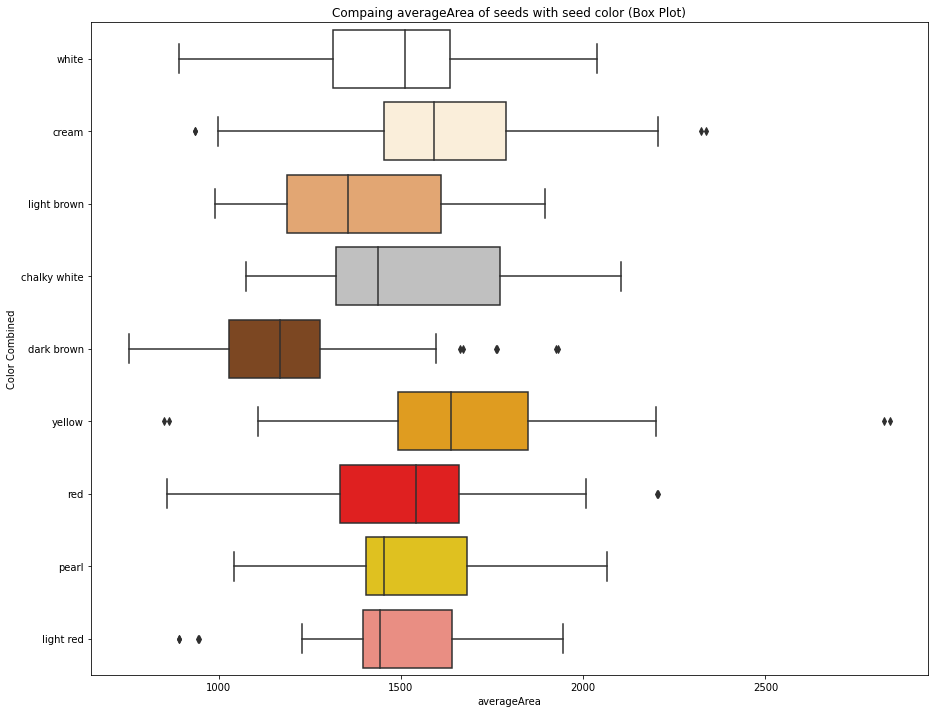

In [48]:
## Set figure size
ax = plt.figure(figsize = [15, 12])

color_dict = dict({
    'chalky white':'silver',
    'cream':'papayawhip',
    'dark brown':'saddlebrown',
    'light brown':'sandybrown',
    'light red':'salmon',
    'pearl':'gold',
    'red':'red',
    'white':'white',
    'yellow':'orange'
})

## Create scatter plot
sns.boxplot(x = 'averageArea', y = 'Color Combined', data = df_merged, palette = color_dict)

## Add labels
plt.title('Compaing averageArea of seeds with seed color (Box Plot)')
plt.ylabel('Color Combined')
plt.xlabel('averageArea')